# PA 2: Classification - Nearest Neighbors

## Student Details (1 Point)
Student Name and ID: Aiman Abdullah





Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Do not upload the database file [-20 points]


## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.
* Load wine dataset from sklearn datasets. [1 points]
* while selecting best 3 attributes for training and testing your model. [2 points]
* Find the best K. [3 points]
* Split your dataset 70% for training, and 30% for testing the classifier. [2 points]
* Use Euclidean distance.[3 points]
* Test the classifier with three diferent numbers for neighbors and record the results.[3 points]
* Use comments to explain your code and variable names.[2 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, andsupport) for all three different numbers.[6 points]
* Plot the classifier in a 2D projection.[3 points]

# Report (22 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
* Describe the Nearest Neighbors method. [5 points]
* Explain what was your criteria for selecting the three attributes. [7 points]
* Visualizations of the classifier in a 2D projection, and write your observations. [5 points]
* Interprete and compare the results.[5 points]

Do not to forget to cite your sources!

In [1]:
#Student Details:

#Abhinav Wadhwa 1001902991
#Aiman Abdullah 1001472426 
#Harshit Singh 1001877593


In [2]:
%matplotlib inline 

#Array processing
import numpy as np
import sys

#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing and knn classification and predictions
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.preprocessing import label_binarize


#Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the csv file into a Pandas data frame
df_titanic = pd.read_csv('titanic.csv')

# First 5 rows of the dataset
df_titanic.head()



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Last 5 rows of the dataset
df_titanic.tail()



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Atrributes of the dataset

for col in df_titanic.columns: 
    print(col) 

Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None


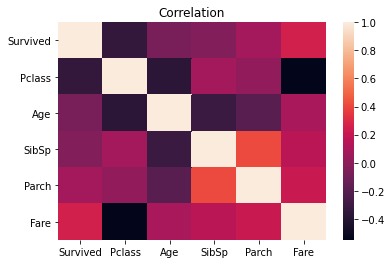

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64


In [6]:
#Calculating and comparing all the correlation between Survival Class and all attributes

print(df_titanic.info())
corr_mat = df_titanic.corr()
sns.heatmap(corr_mat)
plt.title("Correlation")
plt.show()
corr_mat = corr_mat["Survived"].sort_values(ascending=False)
print(corr_mat)



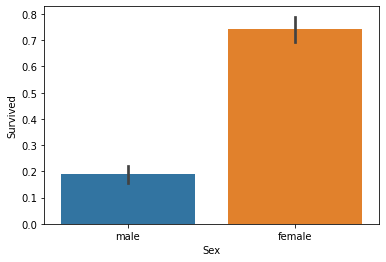

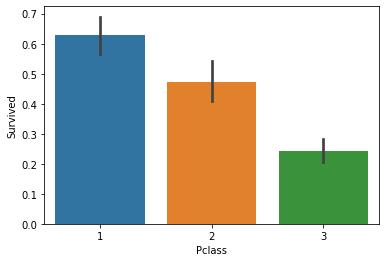

In [7]:
#Plotting Survived Vs Pclass and Sex to understand the survival rate

sns.barplot(data = df_titanic,x = 'Sex', y = 'Survived')
plt.show()

sns.barplot(data = df_titanic,x = 'Pclass', y = 'Survived')
plt.show()

In [8]:
# As per the analysis shown above, pclass,fare and gender are the best attribures for classification

df_titanic["Fare"] = df_titanic["Fare"].astype("category").cat.codes
df_titanic["Pclass"] = df_titanic["Pclass"].astype("category").cat.codes
df_titanic["Sex"] = df_titanic["Sex"].astype("category").cat.codes
X=df_titanic[['Fare','Sex','Pclass']]
X=X.dropna()

df_titanic["Surviced"] = df_titanic["Survived"].astype("category").cat.codes
y=df_titanic[['Survived']]
y=y.dropna()


#Split your dataset 70% for training, and 30% for testing the classifier. 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size  = 0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(623, 3)
(268, 3)
(623, 1)
(268, 1)


Text(0, 0.5, 'Error Rate')

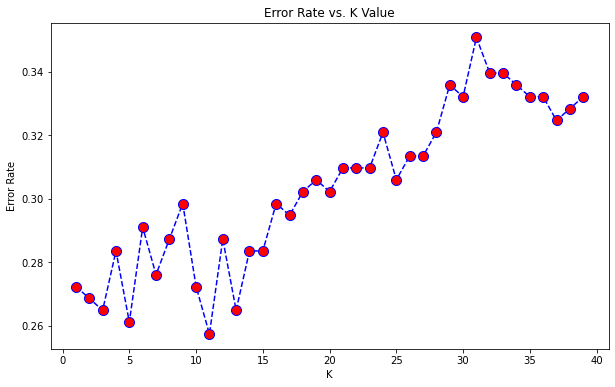

In [9]:
#Plotting 40 K values VS error rate to cmpare and find best 3 K values 

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i=pred_i.reshape(268,1)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
   

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       170
           1       0.64      0.62      0.63        98

    accuracy                           0.74       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.73      0.74      0.73       268

Accuracy of KNN classifier on test set: 0.74


<AxesSubplot:>

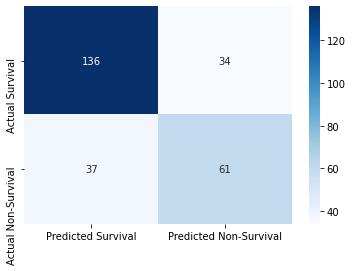

In [10]:
#Use Euclidean distance for KNN.
#Select only 3 attributes for training and testing your model.
#Test it with three different number for neighbors and record the results.
#For all of them print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support).
# Make predictions on validation dataset
#mentioning the k neighbors 

#from the above plot we can determine K values with leaset error rates so we will use these values to make predictions

# K = 3

knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
#train the model using training sets-features,labels
knn.fit(X_train, y_train) 
#predict output
predictions = knn.predict(X_test)
# printing the classification report for knn
print(classification_report(y_test, predictions))
#Calculating Accuracy
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

#Confusion matrix for Naiver Bayes
df_cm = pd.DataFrame(
confusion_matrix(y_test, predictions),
columns=['Predicted Survival', 'Predicted Non-Survival'],
index=['Actual Survival', 'Actual Non-Survival'])
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')


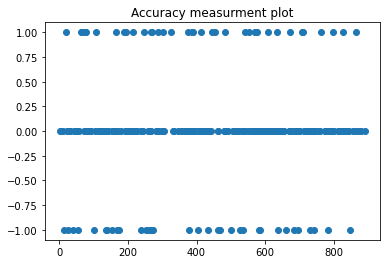

In [11]:
# Plotting the difference between the actual values and predicted values
predictions=predictions.reshape(268,1)
plt.plot(y_test - predictions, marker='o', linestyle='')
plt.title("Accuracy measurment plot")
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       170
           1       0.63      0.59      0.61        98

    accuracy                           0.72       268
   macro avg       0.70      0.70      0.70       268
weighted avg       0.72      0.72      0.72       268

Accuracy of KNN classifier on test set: 0.72


<AxesSubplot:>

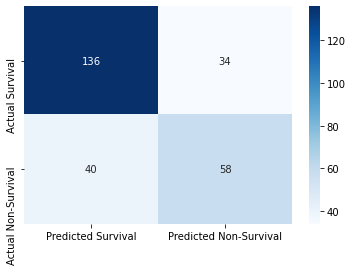

In [12]:
# K = 7

knn = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
#train the model using training sets-features,labels
knn.fit(X_train, y_train) 
#predict output
predictions = knn.predict(X_test)
# printing the classification report for knn
print(classification_report(y_test, predictions))
#Calculating Accuracy
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

#Confusion matrix for Naiver Bayes
df_cm = pd.DataFrame(
confusion_matrix(y_test, predictions),
columns=['Predicted Survival', 'Predicted Non-Survival'],
index=['Actual Survival', 'Actual Non-Survival'])
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

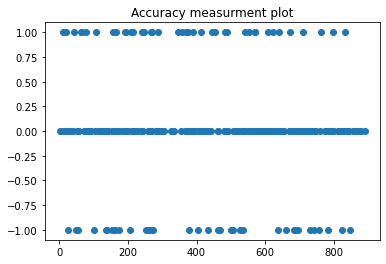

In [13]:
# Plotting the difference between the actual values and predicted values
predictions=predictions.reshape(268,1)
plt.plot(y_test - predictions, marker='o', linestyle='')
plt.title("Accuracy measurment plot")
plt.show()

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       170
           1       0.66      0.46      0.54        98

    accuracy                           0.72       268
   macro avg       0.70      0.66      0.67       268
weighted avg       0.71      0.72      0.70       268

Accuracy of KNN classifier on test set: 0.72


<AxesSubplot:>

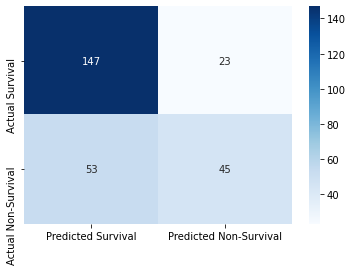

In [14]:
# K = 15

knn = KNeighborsClassifier(n_neighbors=15,metric='euclidean')
#train the model using training sets-features,labels
knn.fit(X_train, y_train) 
#predict output
predictions = knn.predict(X_test)
# printing the classification report for knn
print(classification_report(y_test, predictions))
#Calculating Accuracy
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

#Confusion matrix for Naiver Bayes
df_cm = pd.DataFrame(
confusion_matrix(y_test, predictions),
columns=['Predicted Survival', 'Predicted Non-Survival'],
index=['Actual Survival', 'Actual Non-Survival'])
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

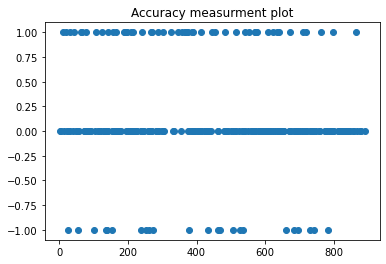

In [15]:
# Plotting the difference between the actual values and predicted values
predictions=predictions.reshape(268,1)
plt.plot(y_test - predictions, marker='o', linestyle='')
plt.title("Accuracy measurment plot")
plt.show()

## <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>

In [16]:
from sklearn.decomposition import TruncatedSVD
X_train_reduced = TruncatedSVD(n_components=2, random_state=0).fit_transform(X_train)
X_test_reduced = TruncatedSVD(n_components=2, random_state=0).fit_transform(X_test)

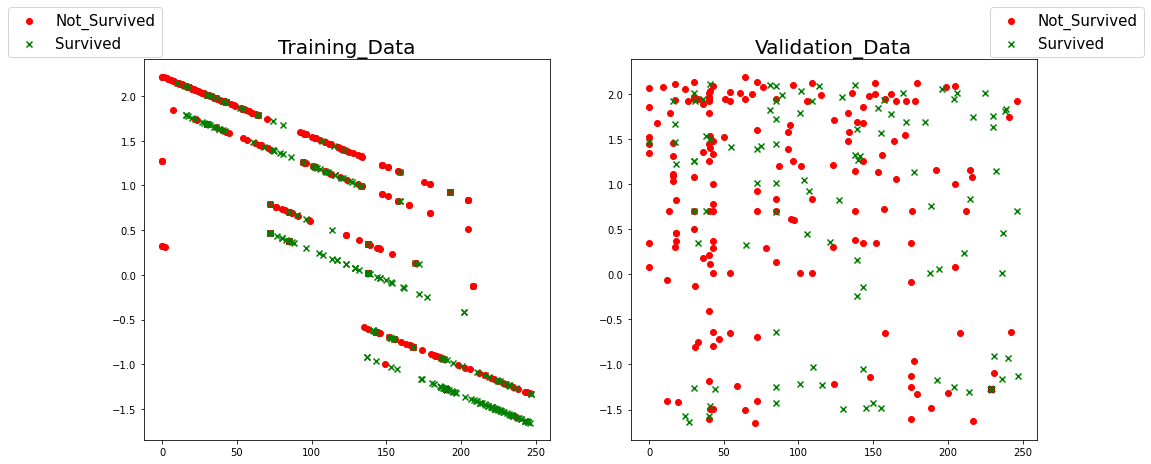

In [17]:
f, axs = plt.subplots(1,2,figsize=(16,7))
axs[0].set_title('Training_Data',fontsize=20)
l1 = axs[0].scatter(X_train_reduced[np.where(y_train == 0), 0], X_train_reduced[np.where(y_train == 0), 1], marker='o', c='red')
l2 = axs[0].scatter(X_train_reduced[np.where(y_train == 1), 0], X_train_reduced[np.where(y_train == 1), 1], marker='x', c='green')
f.legend((l1, l2), ('Not_Survived', 'Survived'), 'upper left',fontsize=15)
axs[1].set_title('Validation_Data',fontsize=20)
l3 = axs[1].scatter(X_test_reduced[np.where(y_test == 0), 0], X_train_reduced[np.where(y_test == 0), 1], marker='o', c='red')
l4 = axs[1].scatter(X_test_reduced[np.where(y_test == 1), 0], X_train_reduced[np.where(y_test == 1), 1], marker='x', c='green')
f.legend((l3, l4), ('Not_Survived', 'Survived'), 'upper right',fontsize=15)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
